In [2]:
from bids import BIDSLayout
from nilearn import image as img
from nilearn import plotting as plot

In [3]:
#base directory
fmriprep_dir='Full-Dataset'
layout=BIDSLayout(fmriprep_dir)

In [4]:
t1_files=layout.get(subject='01',datatype='anat',extension='.nii.gz',return_type="file")

In [5]:
print(t1_files)

["c:\\Reuben's Code's\\PyTorch\\DataSet Testing\\Full-Dataset\\sub-01\\anat\\sub-01_T1w.nii.gz"]


In [6]:
t1_image=img.load_img(t1_files)

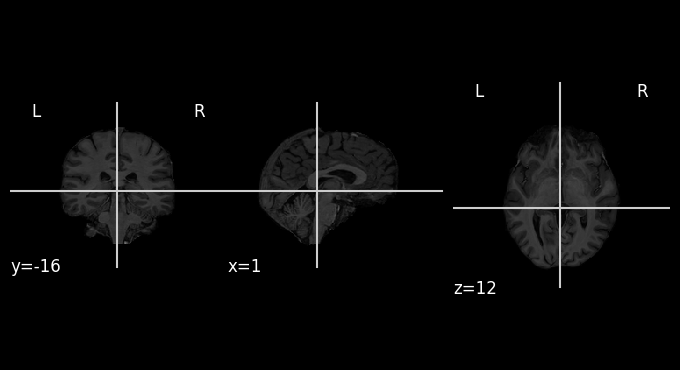

In [7]:
plot.plot_anat(t1_image)

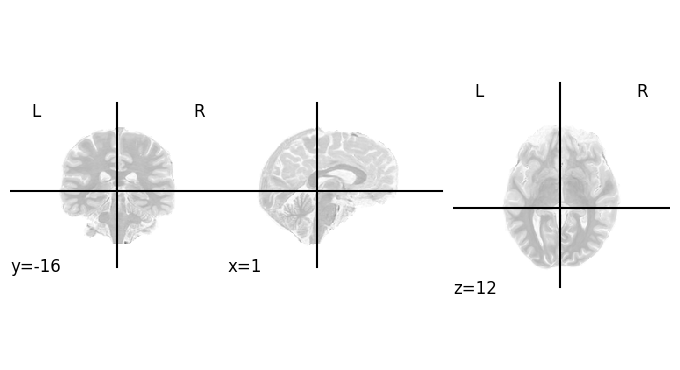

In [8]:
invert_image=img.math_img('-a',a=t1_image)
plot.plot_anat(invert_image)

# Applying a Mask


Let's extend this idea of applying operations to each element of an image to multiple images. Instead of specifying just one
image like the following:
```img.math_img('a+1,a=img_a)```
We can specify multiple images by tacking on additional variables:
```img.math_img('a+b',a=img_a,b=img_b)```

The key requirement here is that when dealing with muttiple images, that the size of the images must be the same. The reason
being is that we're deaing with element-wise operations. That means that some voxel (i,j,k) in ```img_a``` is being paired with some
voxel in img_b when performing operations. So every voxel in img_a must havesomepairwith a voxel in ```img_b``` ;
sizes must be the same.

We can take advantage of this property when masking our data using multiplication. Masking works by muttipling a raw image
(our tl ), with some mask image (our bm). Whichever voxel (i,j,k) has a value of O in the mask multiplies with voxel (i,j,k) in
the raw image resulting in a product of O. Conversely. any voxel (i,j,k) in the mask with a value of 1 multiplies with voxel (i,j,k) in
the raw image resulting in the same value. Left try this out in practice and see what the result is:

Slicing is done easily on an image file using the attribute ```.slicer``` of a Nilearn image object. For example we can grab the 10th slice along the x axis as follows:

In [8]:
x_slice=t1_image.slicer[10:11,:,:]

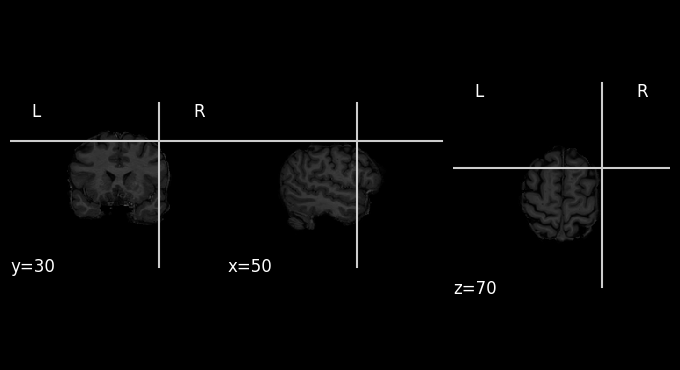

In [9]:
plot.plot_anat(t1_image,cut_coords=(50,30,70))